## set working directory

In [1]:
setwd("/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/")
paste("Working dir: ", getwd())

[1] "Working dir:  /Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model"

## import packages

In [2]:
install.packages("pacman")
pacman::p_load(fields, AtmRay, maptools, raster, plot3D, rhdf5, scatterplot3d, akima, rgl, gtools, sp, ggplot2, 
               phylin, geoR, xts, signal) 

Installing package into ‘/Users/shua784/Library/R/3.4/library’
(as ‘lib’ is unspecified)



The downloaded binary packages are in
	/var/folders/b_/kpbcrn3s4_1770_6k278969jd__sdl/T//RtmpbOB0Ut/downloaded_packages


## import model configuration data

In [3]:
# load(fname_model_inputs.r)
load("results/model_inputs_200x200x1.r")

## load ASCII files and interpolate to model domain

In [ ]:
if (!file.exists(fname_ascii.r)) {
  
hanford_data = readAsciiGrid(fname_hanford, as.image = T)
basalt_data = readAsciiGrid(fname_basalt, as.image = T)
cold_creek_data = readAsciiGrid(fname_cold_creek, as.image = T)
taylor_flats_data = readAsciiGrid(fname_taylor_flats, as.image = T)
ringold_e_data = readAsciiGrid(fname_ringold_e, as.image = T)
ringold_lm_data = readAsciiGrid(fname_ringold_lm, as.image = T)
ringold_a_data = readAsciiGrid(fname_ringold_a, as.image = T)
river_bath_data = readAsciiGrid(fname_river_bath, as.image = T)

save(list = c("hanford_data", "basalt_data", "cold_creek_data", "taylor_flats_data", "ringold_e_data", "ringold_lm_data", "ringold_a_data", "river_bath_data"), file = fname_ascii.r)


} else {
  load(fname_ascii.r) ## load into stored geologic data
}
  

## Interpolate geologic framework over model domain

In [ ]:
# cells_model = expand.grid(x,y) # expand grid to include all x-y coordinates
# cells_proj = model_to_proj(model_origin,angle,cells_model) # convert model coord. to proj. coord.

# unit_x = sort(as.numeric(names(table(cells_proj[, 1]))))
# unit_y = sort(as.numeric(names(table(cells_proj[, 2]))))

cells_hanford = interp.surface(hanford_data, cells_proj) # map surface to model grids
cells_basalt = interp.surface(basalt_data, cells_proj) # map surface to model grids
cells_cold_creek = interp.surface(cold_creek_data, cells_proj)
cells_taylor_flats = interp.surface(taylor_flats_data, cells_proj)
cells_ringold_e = interp.surface(ringold_e_data, cells_proj)
cells_ringold_lm = interp.surface(ringold_lm_data, cells_proj)
cells_ringold_a = interp.surface(ringold_a_data, cells_proj)
cells_river_bath = interp.surface(river_bath_data, cells_proj)

cells_hanford = array(cells_hanford, c(nx, ny))
cells_basalt = array(cells_basalt, c(nx, ny))
cells_cold_creek = array(cells_cold_creek, c(nx, ny))
cells_taylor_flats = array(cells_taylor_flats, c(nx, ny))
cells_ringold_e = array(cells_ringold_e, c(nx, ny))
cells_ringold_lm = array(cells_ringold_lm, c(nx, ny))
cells_ringold_a = array(cells_ringold_a, c(nx, ny))
cells_river_bath = array(cells_river_bath, c(nx, ny))

In [ ]:
save(list=c("cells_hanford", "cells_basalt", "cells_cold_creek", "cells_taylor_flats", "cells_ringold_e",
            "cells_ringold_lm", "cells_ringold_a", "cells_river_bath"), file=fname_geoFramework.r)

In [4]:
load(fname_geoFramework.r)

## plot each geologic layer

quartz_off_screen 
                3

pdf 
  2

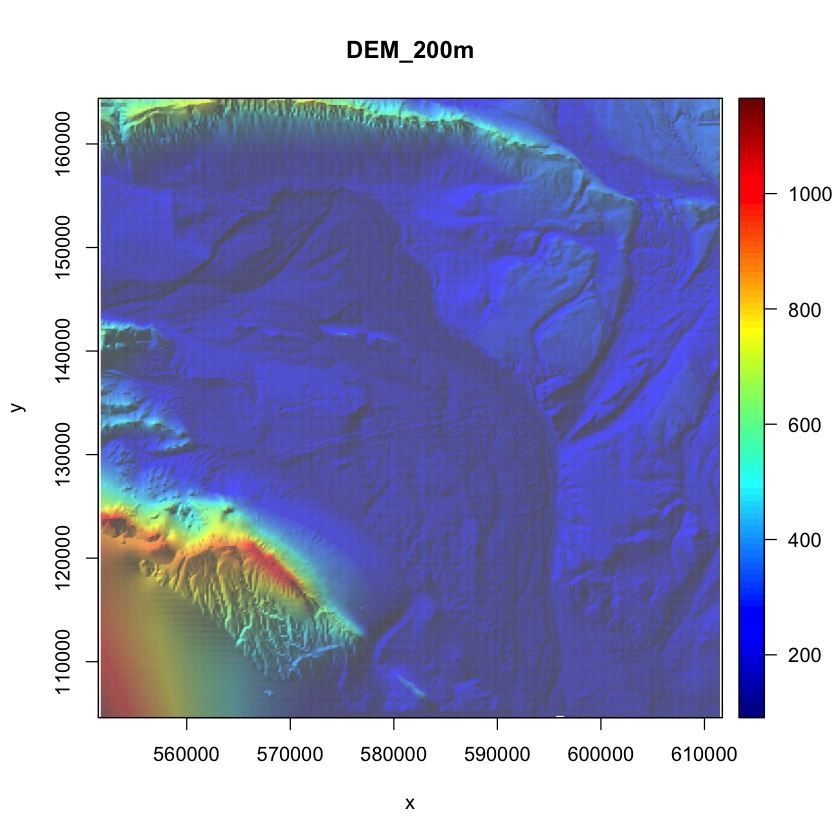

In [5]:
#if (is.plot) {
  
  
  # open3d()
  # bg3d("white")
  # nbcol = 100
  # color = rev(rainbow(nbcol, start = 0/6, end = 4/6))
  # zcol  = cut(cells_basalt, nbcol)
  
  # persp3d(unit_x, unit_y, cells_basalt, col = color[zcol], aspect = c(1,1,0.2), box= F)
  # persp3d(unit_x, unit_y, cells_hanford, col = color[zcol], aspect = c(1,1,0.2), add = TRUE)
  # persp3d(unit_x, unit_y, cells_hanford, col = "red", aspect = c(1,1,1), add = TRUE)
  
  # persp3d(unit_x, unit_y, cells_basalt, col = "blue", aspect = c(1,1,1), box= F)
  # persp3d(unit_x, unit_y, cells_ringold_lm, col = "red", aspect = c(1,1,1), add = TRUE)
  # persp3d(unit_x, unit_y, cells_ringold_a, col = "green", aspect = c(1,1,1), add = TRUE)
  # persp3d(unit_x, unit_y, cells_ringold_e, col = "yellow", aspect = c(1,1,1), add = TRUE, alpha=0.5)
  # persp3d(unit_x, unit_y, cells_taylor_flats, col = "purple", aspect = c(1,1,1), add = TRUE, alpha=0.5)
  # persp3d(unit_x, unit_y, cells_cold_creek, col = "cyan", aspect = c(1,1,1), add = TRUE, alpha=0.5)
  
  
##---------------------------- plot hanford ------------------------- 
## crop dataset to model region
# x_model = which(hanford_data$x >= west_x & hanford_data$x <= east_x)
# y_model = which(hanford_data$y >= south_y & hanford_data$y <= north_y)

# hanford_data_model = list()
# hanford_data_model = list(x = hanford_data$x[x_model], y = hanford_data$y[y_model], z = hanford_data$z[x_model, y_model])


#jpeg(fname_fig.hanford2d, width=8,height=8,units='in',res=300,quality=100)
# image2D(hanford_data_model, shade=0.2, rasterImage = F, NAcol = "white",
#         main = c("DEM_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.hanford2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_hanford, x= unit_x, y= unit_y, shade=0.5, rasterImage = F, NAcol = "white", border = NA, resfac = 3,
        main = paste("DEM_", idx,"m", sep = ""), asp = 1)
dev.copy(jpeg, width=8,height=8,units='in',res=300,quality=100, file = fname_fig.hanford2d.model)
dev.off()

## show the perspective view of the surface plot
# open3d()
# bg3d("white")
# nbcol = 100
# color = rev(rainbow(nbcol, start = 0/6, end = 4/6))
# zcol  = cut(hanford_data_model$z, nbcol)
# persp3d(hanford_data_model$x, hanford_data_model$y, hanford_data_model$z, col = color[zcol], aspect = c(1,1,0.2))
# 

In [ ]:
##---------------------------- plot basalt ------------------------- 
## crop dataset to model region
x_model = which(basalt_data$x >= west_x & basalt_data$x <= east_x)
y_model = which(basalt_data$y >= south_y & basalt_data$y <= north_y)

basalt_data_model = list()
basalt_data_model = list(x = basalt_data$x[x_model], y = basalt_data$y[y_model], z = basalt_data$z[x_model, y_model])

#jpeg(fname_fig.basalt2d, width=8,height=8,units='in',res=300,quality=100)
image2D(basalt_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("basalt_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.basalt2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_basalt, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("basalt_", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot ringold ------------------------- 
## crop dataset to model region
x_model = which(ringold_a_data$x >= west_x & ringold_a_data$x <= east_x)
y_model = which(ringold_a_data$y >= south_y & ringold_a_data$y <= north_y)

ringold_a_data_model = list()
ringold_a_data_model = list(x = ringold_a_data$x[x_model], y = ringold_a_data$y[y_model], z = ringold_a_data$z[x_model, y_model])

#jpeg(fname_fig.ringold_a_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(ringold_a_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("ringold_a_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.ringold_a_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_ringold_a, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("ringold_a_", idx,"m", sep = ""), asp = 1)
#dev.off()

##
x_model = which(ringold_e_data$x >= west_x & ringold_e_data$x <= east_x)
y_model = which(ringold_e_data$y >= south_y & ringold_e_data$y <= north_y)

ringold_e_data_model = list()
ringold_e_data_model = list(x = ringold_e_data$x[x_model], y = ringold_e_data$y[y_model], z = ringold_e_data$z[x_model, y_model])

#jpeg(fname_fig.ringold_e_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(ringold_e_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("ringold_e_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.ringold_e_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_ringold_e, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("ringold_e_", idx,"m", sep = ""), asp = 1)
#dev.off()

##
x_model = which(ringold_lm_data$x >= west_x & ringold_lm_data$x <= east_x)
y_model = which(ringold_lm_data$y >= south_y & ringold_lm_data$y <= north_y)

ringold_lm_data_model = list()
ringold_lm_data_model = list(x = ringold_lm_data$x[x_model], y = ringold_lm_data$y[y_model], z = ringold_lm_data$z[x_model, y_model])

#jpeg(fname_fig.ringold_lm_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(ringold_lm_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("ringold_lm_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.ringold_lm_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_ringold_lm, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("ringold_lm_", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot cold creek ------------------------- 
x_model = which(cold_creek_data$x >= west_x & cold_creek_data$x <= east_x)
y_model = which(cold_creek_data$y >= south_y & cold_creek_data$y <= north_y)

cold_creek_data_model = list()
cold_creek_data_model = list(x = cold_creek_data$x[x_model], y = cold_creek_data$y[y_model], z = cold_creek_data$z[x_model, y_model])

#jpeg(fname_fig.cold_creek_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(cold_creek_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("cold_creek_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.cold_creek_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_cold_creek, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("cold_creek_", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot taylor flats ------------------------- 
x_model = which(taylor_flats_data$x >= west_x & taylor_flats_data$x <= east_x)
y_model = which(taylor_flats_data$y >= south_y & taylor_flats_data$y <= north_y)

taylor_flats_data_model = list()
taylor_flats_data_model = list(x = taylor_flats_data$x[x_model], y = taylor_flats_data$y[y_model], z = taylor_flats_data$z[x_model, y_model])

#jpeg(fname_fig.taylor_flats_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(taylor_flats_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("taylor_flats_30m"), asp = 1)
#dev.off()

#jpeg(fname_fig.taylor_flats_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_taylor_flats, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("taylor_flats", idx,"m", sep = ""), asp = 1)
#dev.off()

In [ ]:
##---------------------------- plot river bathymetry ------------------------- 
x_model = which(river_bath_data$x >= west_x & river_bath_data$x <= east_x)
y_model = which(river_bath_data$y >= south_y & river_bath_data$y <= north_y)

river_bath_data_model = list()
river_bath_data_model = list(x = river_bath_data$x[x_model], y = river_bath_data$y[y_model], z = river_bath_data$z[x_model, y_model])

#jpeg(fname_fig.river_bath_2d, width=8,height=8,units='in',res=300,quality=100)
image2D(river_bath_data_model, shade=0.2, rasterImage = F, NAcol = "white",
        main = c("river_bath_20m"), asp = 1)
#dev.off()

#jpeg(fname_fig.river_bath_2d.model, width=8,height=8,units='in',res=300,quality=100)
image2D(z= cells_river_bath, x= unit_x, y= unit_y, shade=0.2, rasterImage = F, NAcol = "white",
        main = paste("river_bath_", idx,"m", sep = ""), asp = 1)
#dev.off()

}